In [1]:

import os

data_path = "./RSAlgorithms/data/"

prefix = "dls"

# construct rating file
with open("./datas/delicious/user_taggedbookmarks-timestamps.dat", "r") as f:
    lines = f.readlines()[1:]
    f.close()

(array([17009.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,     0.,     0.,     0., 17620.,     0.,     0.,     0.,
            0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,     0.,     0.,     0.,     0.,     0., 18573.,     0.,
            0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,     0.,     0., 15159.,     0.,     0.,     0.,     0.,
            0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0., 11223.,     0.,     0.,     0.,     0.,     0., 

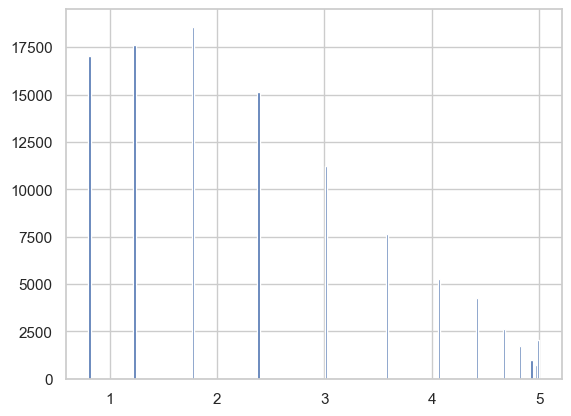

In [58]:
pair_counts = {}
for line in lines:
    parts = line.strip().split()
    user_id = parts[0]
    bookmark_id = parts[1]
    pair = (user_id, bookmark_id)
    pair_counts[pair] = pair_counts.get(pair, 0) + 1
marks = []
for pair, count in pair_counts.items():
    marks.append(count)

    import numpy as np
    import scipy.stats as stats

    marks = np.array(marks)
    # marks = np.sort(marks)
    original_marks = marks.copy()

    # Calculate the mean and standard deviation of the original marks
    mean_original = np.mean(original_marks)
    std_dev_original = np.std(original_marks)

    # Normalize the marks to a standard normal distribution (mean=0, std_dev=1)
    z_scores = (original_marks - mean_original) / std_dev_original

    # Use the cumulative distribution function (CDF) to map to a 0-1 range
    normalized_0_1 = stats.norm.cdf(z_scores)

    # Scale and shift this range to 1-5
    normalized_1_5 = normalized_0_1 * 5

    # Show some statistics of the normalized marks
    min_mark, max_mark, mean_normalized, std_dev_normalized = (
        np.min(normalized_1_5), 
        np.max(normalized_1_5), 
        np.mean(normalized_1_5), 
        np.std(normalized_1_5)
    )

    min_mark, max_mark, mean_normalized, std_dev_normalized

    import numpy as np



    ## plot marks distribution

    import matplotlib.pyplot as plt

    plt.hist(normalized_1_5, bins=200)

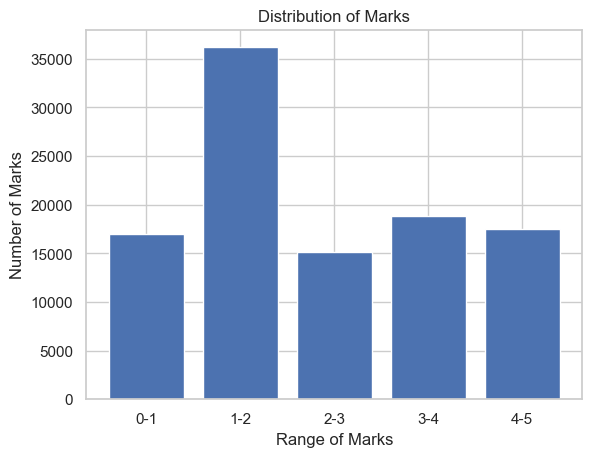

In [59]:
import matplotlib.pyplot as plt
import numpy as np
import random

# Example list of marks (replace this with your actual data)
marks = normalized_1_5

# Define the ranges
ranges = [(0, 1), (1, 2), (2, 3), (3, 4), (4, 5)]

# Count the number of marks in each range
counts = [sum(1 for mark in marks if low <= mark < high) for low, high in ranges]

# Names for each range
range_names = ['0-1', '1-2', '2-3', '3-4', '4-5']

# Creating the bar plot
plt.bar(range_names, counts)

# Adding titles and labels
plt.title('Distribution of Marks')
plt.xlabel('Range of Marks')
plt.ylabel('Number of Marks')

# Show the plot
plt.show()


In [60]:
for i, (key, value) in enumerate(pair_counts.items()):
    pair_counts[key] = normalized_1_5[i]

In [61]:
pair_counts

{('8', '1'): 0.8026394467561062,
 ('8', '2'): 0.8026394467561062,
 ('8', '7'): 1.7834265111301029,
 ('8', '8'): 1.7834265111301029,
 ('8', '9'): 1.2415590317195861,
 ('8', '10'): 1.2415590317195861,
 ('8', '11'): 1.7834265111301029,
 ('8', '14'): 3.0082582365863795,
 ('8', '15'): 1.2415590317195861,
 ('8', '16'): 1.2415590317195861,
 ('8', '17'): 1.2415590317195861,
 ('8', '18'): 1.2415590317195861,
 ('8', '19'): 1.2415590317195861,
 ('8', '20'): 1.2415590317195861,
 ('8', '22'): 1.7834265111301029,
 ('8', '24'): 1.2415590317195861,
 ('8', '25'): 1.2415590317195861,
 ('8', '26'): 1.2415590317195861,
 ('8', '27'): 1.2415590317195861,
 ('8', '30'): 1.2415590317195861,
 ('8', '32'): 1.2415590317195861,
 ('8', '33'): 1.2415590317195861,
 ('8', '34'): 1.2415590317195861,
 ('8', '35'): 1.2415590317195861,
 ('8', '36'): 1.2415590317195861,
 ('8', '37'): 1.2415590317195861,
 ('8', '38'): 1.2415590317195861,
 ('8', '41'): 0.8026394467561062,
 ('8', '42'): 0.8026394467561062,
 ('8', '43'): 0.802

In [62]:

# Write the results to a new file
with open(os.path.join(data_path, f'{prefix}_ratings.txt'), "w") as output_file:
    for pair, weight in pair_counts.items():
        user_id, bookmark_id = pair
        if weight > 5 : 
          weight = 5
        output_file.write(f'{user_id} {bookmark_id} {weight}\n')

# construct trust file
with open("./datas/delicious/user_contacts.dat", "r") as f:
    lines = f.readlines()[1:]
    f.close()

trusts = []
for line in lines:
        line = line.strip().split()
        userID = line[0]
        contactID = line[1]
        trust_weight = 1
        trusts.append([userID, contactID, trust_weight])

with open(os.path.join(data_path, f'{prefix}_trust.txt'), "w") as f:
    for t in trusts:
        f.write(f'{t[0]} {t[1]} {t[2]}\n')
    f.close()